# Анализ гипотез по увеличению выручки интернет-магазина

## Введение

__Целью данного проекта__ является анализ гипотез по увеличению выручки интернет магазина, а так же анализ проведенного A/B теста.

Проект состоит из двух частей.   
__В первой части__ будет проведена приоритизация гипотез различными методами.  
__Во второй части__ будут проанализированны результаты A/B-теста и сделан вывод о влиянии новых методов на прибыль магазина.

В работе будут использованы следующие библиотеки языка Python:

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Приоритизация гипотез

### Обзор данных

Для приоритизации гипотез предоставлен набор данных с 9 гипотезами по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

- __Hypothesis__ — краткое описание гипотезы;
- __Reach__ — охват пользователей по 10-балльной шкале;
- __Impact__ — влияние на пользователей по 10-балльной шкале;
- __Confidence__ — уверенность в гипотезе по 10-балльной шкале;
- __Efforts__ — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Сохраним набор данных о рассматриваемых гипотезах в переменную `'hypothesis'`. Приведем названия столбцов к стилистическим нормам и избавим описание гипотез от опечатки.

In [2]:
hypothesis = pd.read_csv("hypothesis.csv")

pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.3f}'.format)
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.loc[3, 'hypothesis'] = hypothesis.loc[3, 'hypothesis'].replace('структура', 'структуру')

hypothesis 

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Чтобы не оперировать длинными описаниями гипотез, добавим в таблицу столбец с обозначением их заглавными буквами латинского алфавита.

In [3]:
import string
abc = string.ascii_uppercase 

for i in hypothesis.index:
    hypothesis.loc[i, 'index_name'] = abc[i]
hypothesis

,hypothesis,reach,impact,confidence,efforts,index_name
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,A
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,B
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,C
3,"Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,D
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,E
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,F
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,G
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,H
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,I


### Фреймворк ICE

Фреймворк ICE для приоритизации гипотез включает в себя три компонента:

- __Impact__ — влияние на пользователей
- __Confidence__ — уверенность в гипотезе
- __Efforts__ — затраты ресурсов на проверку гипотезы.

Посчитаем баллы ICE для каждой из представленных гипотез:

In [4]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'index_name', 'ICE']].sort_values(by='ICE', ascending = False)

,hypothesis,index_name,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",I,16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",A,13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",H,11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",G,8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",C,7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",B,2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",F,1.333
3,"Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",D,1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",E,1.000


Лидирами оказались гипотезы:
- "Запустить акцию, дающую скидку на товар в день рождения"
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

### Фреймворк RICE 

Фреймворк RICE для приоритизации гипотез включает в себя четыре компонента:

- __Reach__ — охват пользователей
- __Impact__ — влияние на пользователей
- __Confidence__ — уверенность в гипотезе
- __Efforts__ — затраты ресурсов на проверку гипотезы.

Посчитаем баллы RICE для каждой из представленных гипотез:

In [5]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'index_name', 'RICE']].sort_values(by='RICE', ascending = False)

,hypothesis,index_name,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",H,112.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",C,56.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",A,40.000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",G,40.000
8,"Запустить акцию, дающую скидку на товар в день рождения",I,16.200
3,"Изменить структуру категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",D,9.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",B,4.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",F,4.000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",E,3.000


Баллы, набранные гипотезами по фреймворку RICE показали, что приоритет следует отдать гипотезам:
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
- "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".

### Выводы

Два рассмотренных способа приоритизации гипотез различаются учетом или неучетом масштаба изменений, то есть охвата аудитории, которую затронут нововведения.  

Фреймворк ICE не учитывает охват пользователей, и, соответственно, определяет как приоритетные те гипотезы, которые наиболее выгодно проанализировать не зависимо от масштаба их влияния. Такой фреймворк должен больше подойти для компаний с небольшой аудиторией, где разница между охватом пользователей будет не столь заметна.  
Лидером, согластно этому фреймворку является гипотеза "Запустить акцию, дающую скидку на товар в день рождения". Если учитывать охват пользователей, то эта гипотеза находится только на пятом месте по баллам.

Фреймворк RICE учитывает охват пользователей. Такой способ приоритизации гипотез важен для компаний с большой аудиторий, где разница в масштабах воздействия изменений будет существенна. Согласно этому фреймворку, наиболее приоритетной будет гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Если не учитывать охват пользователей, то эта гипотез будет находиться лишь на третьем месте. А гипотеза, занявшая согласно RICE второе место ("Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"), в рейтинге ICE находится лишь на пятом.

Таким образом, при определении приоритета гипотез по улучшению бизнеса важно понимать, когда необходимо учитывать охват аудитории, а когда сделать акцент на качестве самих идей.

## Анализ A/B-теста

### Обзор данных

#### Общий обзор: Пропуски, типы данных, аномалии, дубликаты

Для анализа результатов A/B теста нам предоставлены два набора данных со следующей информацией.

Датафрейм `'orders'`:
- __transactionId__ — идентификатор заказа;
- __visitorId__ — идентификатор пользователя, совершившего заказ;
- __date__ — дата, когда был совершён заказ;
- __revenue__ — выручка заказа;
- __group__ — группа A/B-теста, в которую попал заказ.

Датафрейм `'visitors'`:
- __date__ — дата;
- __group__ — группа A/B-теста;
- __visitors__ — количество пользователей в указанную дату в указанной группе A/B-теста

Сохраним наборв данных в переменные 'orders' и 'visitors', откорректируем тип дынных в столбцах с датой и выведем несколько первых строк получившихся таблиц:

In [6]:
orders = pd.read_csv("orders.csv")
 
visitors = pd.read_csv("visitors.csv")
    
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
    
display(orders.sample(3))
display(visitors.sample(3))

,transactionId,visitorId,date,revenue,group
658,1988035100,1016890234,2019-08-26,17990,B
291,2315635631,2606208134,2019-08-03,4299,A
561,3241914033,3957174400,2019-08-26,2480,B


,date,group,visitors
47,2019-08-17,B,421
1,2019-08-02,A,619
48,2019-08-18,B,737


Проверим наличие пропусков и соответствие типов данных по основной информации о наборах данных:

In [7]:
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

Пропусков в данных нет, типы данных соответствуют содержимому.

Оценим количественные данные с помощью функции describe(). Выведем уникальные значения для категориальных данных и самое раннее и самое позднее значение для столбцов с датой.

In [8]:
print('orders')
display(orders.describe())
print()
print('visitors')
display(visitors.describe())

orders


,transactionId,visitorId,revenue
count,1197.000,1197.000,1197.000
mean,2155621385.530,2165960143.099,8348.006
std,1229084904.760,1236014192.147,39191.132
min,1062393.000,5114589.000,50.000
25%,1166775572.000,1111826046.000,1220.000
50%,2145193898.000,2217984702.000,2978.000
75%,3237740112.000,3177606451.000,8290.000
max,4293855558.000,4283872382.000,1294500.000



visitors


,visitors
count,62.000
mean,607.290
std,114.401
min,361.000
25%,534.000
50%,624.500
75%,710.500
max,770.000


In [9]:
print('orders')
list_unique = sorted(orders['group'].unique())
print('\033[4m' + '\033[1m' + 'group', end='' + '\033[0m')
print(':')
print(*list_unique, sep=', ')
print()

orders
group:
A, B



In [10]:
print('visitors')
list_unique = sorted(visitors['group'].unique())
print('\033[4m' + '\033[1m' + 'group', end='' + '\033[0m')
print(':')
print(*list_unique, sep=', ')
print()

visitors
group:
A, B



In [11]:
print('orders')
print('Минимальная и максимальная дата:')
print(orders['date'].min())
print(orders['date'].max())
print()

print('visitors')
print('Минимальная и максимальная дата:')
print(visitors['date'].min())
print(visitors['date'].max())
print()


orders
Минимальная и максимальная дата:
2019-08-01 00:00:00
2019-08-31 00:00:00

visitors
Минимальная и максимальная дата:
2019-08-01 00:00:00
2019-08-31 00:00:00



Аномалии в данных отсутствуют. Данные в обеих таблицах предоставлены за месяц с 1 по 31 августа 2019 года.

Проверим наличие дубликатов:

In [12]:
print('orders')
orders.duplicated().sum()

orders


0

In [13]:
print('visitors')
visitors.duplicated().sum()

visitors


0

Явные дубликаты отсутствуют.

#### Обзор количества пользователей, попавших в обе группы

Проверим, есть ли в таблице с заказами пользователи, разные заказы которых попали в разные группы.

Для этого сначала разделим заказы по группам, затем сгруппируем данные по пользователям для двух групп и посмотрим, пересекаются ли они.

In [14]:
group_a = orders[orders['group'] == 'A'].reset_index(drop=True)
group_b = orders[orders['group'] == 'B'].reset_index(drop=True)

visitors_a = group_a.groupby(['visitorId']).agg({'transactionId': 'count', 'revenue': 'sum'})
visitors_b = group_b.groupby(['visitorId']).agg({'transactionId': 'count', 'revenue': 'sum'})

visitors_intersect = visitors_a.merge(visitors_b, on='visitorId', how='inner')
print('Количество пользователей, попавших в обе группы:', visitors_intersect['transactionId_x'].count())

Количество пользователей, попавших в обе группы: 58


In [15]:
sum_intersect = sum(visitors_intersect['transactionId_x']) + sum(visitors_intersect['transactionId_y'])
print('Количество заказов, совершенных пользователями, попавшими в обе группы:', sum_intersect)

Количество заказов, совершенных пользователями, попавшими в обе группы: 181


Согласно полученым данным 58 пользователей оказались в обеих группах и совершили 181 заказ.

In [16]:
print('Доля заказов, совершенных пользователями, попавшими в обе группы:')
print("{0:.2%}".format(181 / 1197))

Доля заказов, совершенных пользователями, попавшими в обе группы:
15.12%


Если удалять этих пользователей, по придется удалить 15% данных в датафрейме 'orders'. Это слишком много, оставим все как есть.

Данные готовы к работе.

### Анализ кумулятивных метрик

Для того, чтобы оценить общую тенденцию динамики количества заказов и выручки в двух группах за рассматриваемый период, используем кумулятивные метрики. Они помогут понять как различаются показатели в группах, выявить наличие выбросов и установить, стабилизировались ли показания на момен окончания эксперимента.

#### Кумулятивная выручка по группам

Рассмотрим, как изменялась выручка с накоплением по группам. Для этого преобразуем исходные данные и построим график, отображающий динамику изменений за период теста.

In [17]:
dates_groups = orders[['date','group']].drop_duplicates()

In [18]:
orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(
        orders['date'] <= x['date'], orders['group'] == 
        x['group'])]\
    .agg({'date' : 'max', 
          'group' : 'max', 
          'transactionId' : 'nunique', 
          'visitorId' : 'nunique', 
          'revenue' : 'sum'}), 
    axis=1).sort_values(by=['date','group'])

In [19]:
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

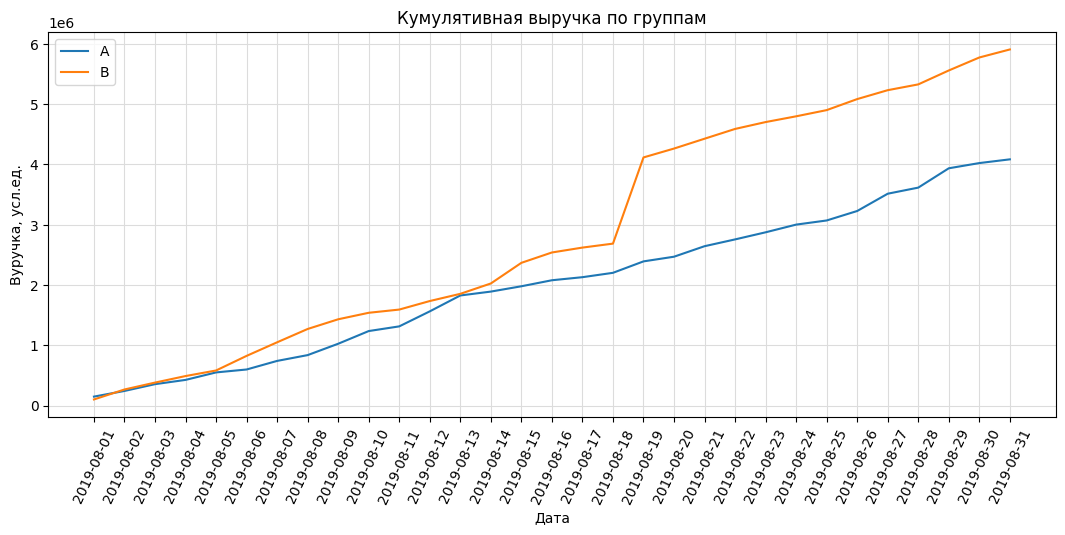

In [20]:
fig = plt.figure(figsize=(13, 5))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.xticks(ticks=cumulative_revenue_a['date'], rotation=65)
plt.grid(color = 'gainsboro')
plt.title('Кумулятивная выручка по группам')
plt.ylabel('Вуручка, усл.ед.')
plt.xlabel('Дата')

plt.legend()
plt.show()

Анализ получившегося графика позволяет сделать следующие выводы:
- Начиная с 6 августа группа В обгоняет группу А по сумме выручки и сохраняет лидерство на протяжении всего месяца. 
- 19 августа в группе В происходит особо резкое повышение кумулятивной выручки, что говорит о наличие выброса, которые нужно будет удалить при заключительном анализе.
- После 19 августа линии выручки по группам выравниваются и сохряняют стабильный равномерный рост до конца месяца.

#### Кумулятивный средний чек по группам

Построим график кумулятивного среднего чека по группам.

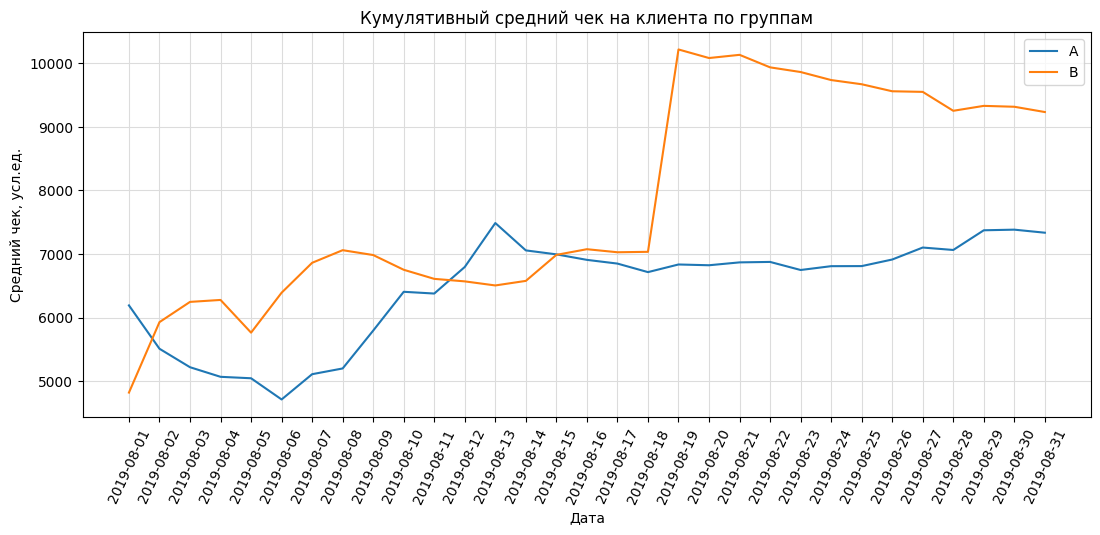

In [21]:
fig = plt.figure(figsize=(13, 5))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.xticks(ticks=cumulative_revenue_a['date'], rotation=65)
plt.grid(color = 'gainsboro')
plt.title('Кумулятивный средний чек на клиента по группам')
plt.ylabel('Средний чек, усл.ед.')
plt.xlabel('Дата')

plt.legend()
plt.show()

Анализ получившегося графика позволяет сделать следующие выводы:
- График кумулятивного среднего чека по группам подтверждает наличие крупного выброса в группе В 19 августа.
- После 19 августа средний чек группы В начинает стабильно снижаться. Если бы не выброс, показатели в этой группе упали бы ниже, чем показатели в группе А.
- Средний чек группы А становится относительно стабильным начиная с середины месяца и коллеблется вокруг 7000 условных единиц.

#### Относительное изменение кумулятивного среднего чека группы B к группе A

Построим график, отражающий относительное изменение кумулятивного среднего чека между двумя группами.

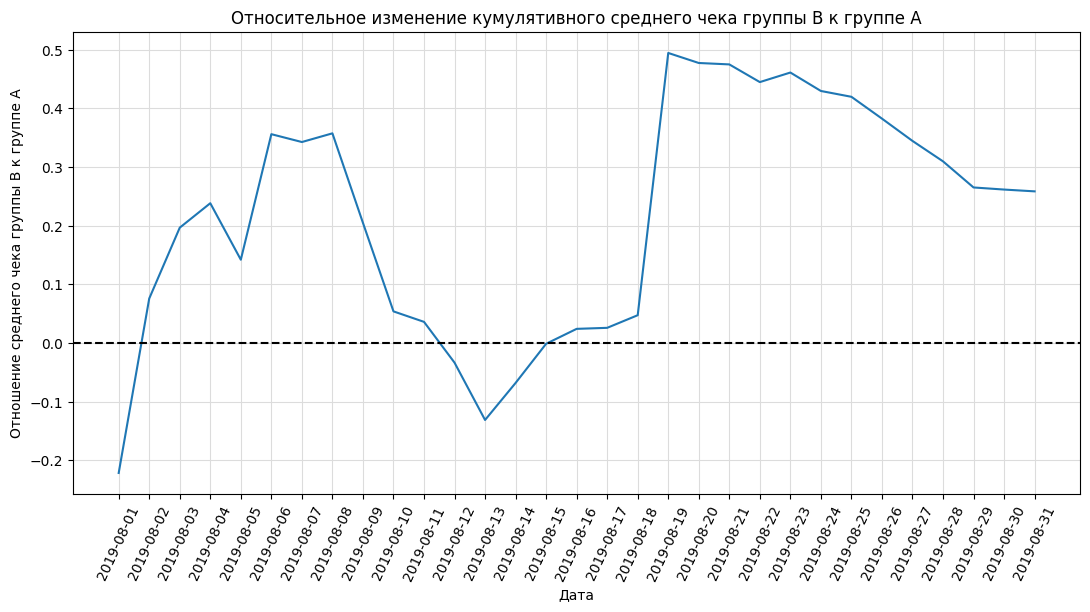

In [22]:
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['A', 'B']
)

# cтроим отношение средних чеков
fig = plt.figure(figsize=(13, 6))

plt.plot(merged_cumulative_revenue['date'],
         (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])
         /(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.xticks(ticks=merged_cumulative_revenue['date'], rotation=65)
plt.grid(color = 'gainsboro')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.ylabel('Отношение среднего чека группы B к группе A')
plt.xlabel('Дата')

plt.show()

Отношение среднего чека группы В к группе А меняются несколько раз. В первой половине месяца он нестабилен, то растет, то падает. Однаков в целом, можно сказать, что в группе В он в этот период выше, чем в группе А.

Во вротой половине месяца наблюдается выброс 19 августа, после которого относительный показатель начинает снижаться. По графику видно, что если бы не выброс, группа В проигрывала бы группе А. В последние три дня теста относительный показатель стабилизируется.

#### Кумулятивное среднее количество заказов на посетителя по группам

Рассмотрим теперь как менялось среднее количество заказов на посетителя с накоплением по группам. Построим для этого соответствующие графики.

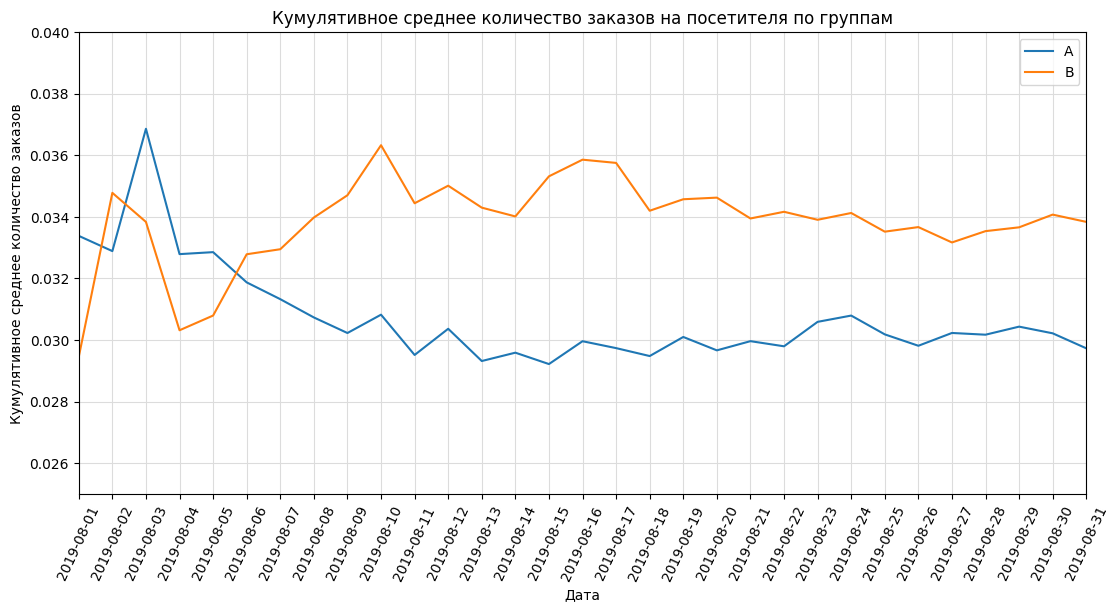

In [23]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
fig = plt.figure(figsize=(13, 6))

plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.0250, 0.04])

plt.xticks(ticks=cumulative_data_a['date'], rotation=65)
plt.grid(color = 'gainsboro')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.ylabel('Кумулятивное среднее количество заказов')
plt.xlabel('Дата')

plt.show()

Группа В обгоняет группу А начиная с 6-го августа и после этого сохраняет лидирующие позиции. Начиная с 18 августа конверсия устанавливается около своего среднего значения.

#### Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A

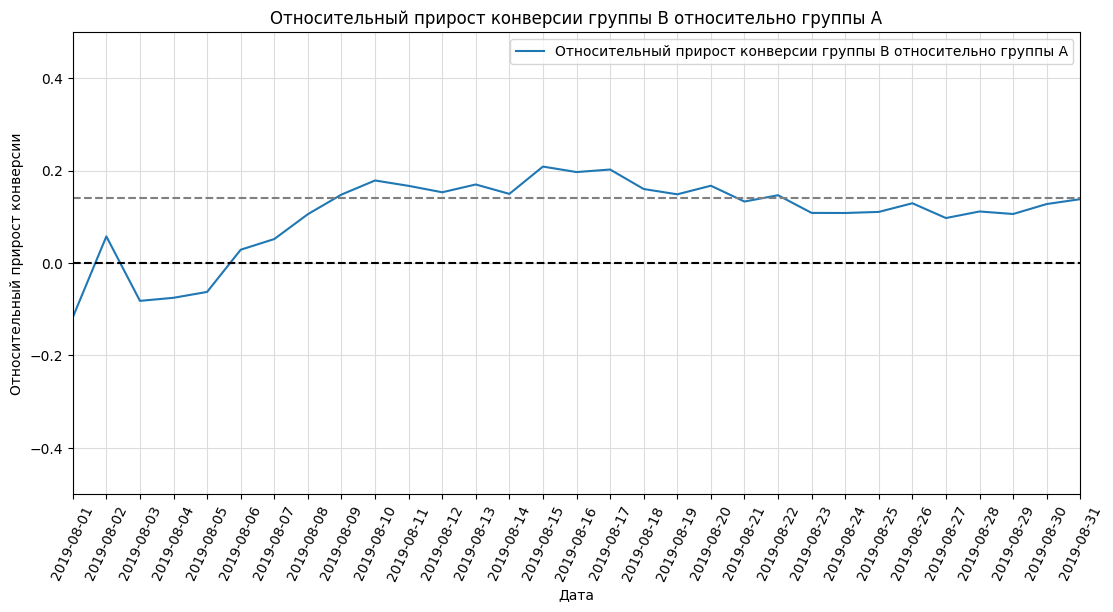

In [24]:
merged_сumulative_сonversions = (
    cumulative_data_a[['date','conversion']]
    .merge(cumulative_data_b[['date','conversion']], 
           left_on='date', 
           right_on='date', 
           how='left', 
           suffixes=['A', 'B'])
)

fig = plt.figure(figsize=(13, 6))
plt.plot(merged_сumulative_сonversions['date'], 
         merged_сumulative_сonversions['conversionB']/merged_сumulative_сonversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")

plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.5, 0.5])

plt.xticks(merged_сumulative_сonversions['date'], rotation=65)
plt.grid(color = 'gainsboro')
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.ylabel('Относительный прирост конверсии')
plt.xlabel('Дата')

plt.show()

График относительного прироста конверсии подтверждает выводы предыдущего подраздела о том, что конверсия группы В на протяжении почти всего месяца стабильно выше чем в группе А.

#### Итоги анализа кумулятивных метрик

Рассмотрение кумулятивных показателей позволяет следать предварительные выводы о результатах и успешности проведенного теста предложенных гипотез.

1. Среднее количество заказов на посетителя относительно быстро пришло к стабильным показателям. В группе В оно выше чем в группе А. Сильное влияние выбросов на эту характеристику не наблюдается. 

2. На показаниях среднего чека на клиента сказываются выбросы. Но если учесть их влияние становится понятно, что после стабилизации этого показателя, средний чек в группе В постепенно падает относительно группы А и выравнивается лишь в последние три дня теста.

3. На показаниях выручки также сказываются выбросы. В целом, в группе В она стабильно выше, чем в группе А даже если отбросить выбросы. По всей видимости, относительный низкий средниний чек на клиента компенсируется более высокой конверсией в группе В.

Важно отметить, что показания среднего чека на клиента стабилизировались лишь в последние три дня теста. Это небольшой, и возможно не достаточный период для того, чтобы сделать точные выводы о том, что в группе В показатели выручки лучше, чем в группе А. 

### Анализ выбросов

Анализ кумулятивных метрик показал наличие выбросов в данных. Установим границы для фильтарации этих выбросов.

#### Количество заказов по пользователям

Построим точечный график распределения количества заказов на пользователя.

In [25]:
orders_by_users = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

orders_by_users.columns = ['visitorId', 'transaction_cnt']

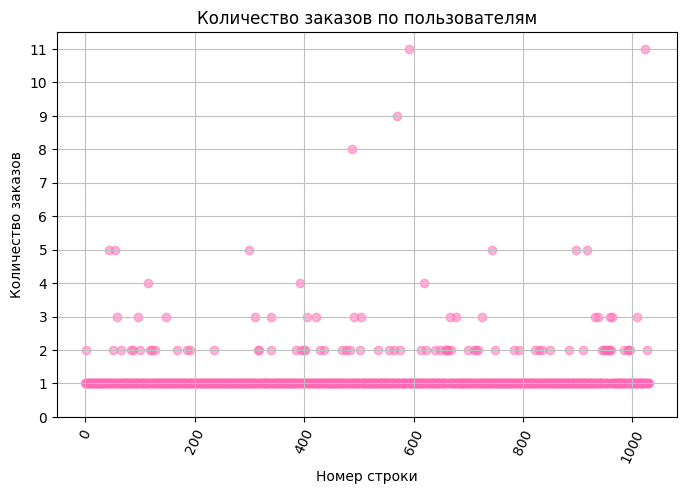

In [26]:
x_values = pd.Series(range(0, len(orders_by_users)))

fig = plt.figure(figsize=(8, 5))
plt.scatter(x_values, orders_by_users['transaction_cnt'], color = 'hotpink', alpha=0.5) 

plt.xticks(rotation=65)
plt.yticks(range(0, 12))
plt.grid(color = 'silver')
plt.title('Количество заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Номер строки')

plt.show()

На графике видно, что для большинства клиентов характерны 1-2 заказа. Большие заначения можно расценивать как выбросы. Проверим это найдя 95-й и 99-й перцентили количества заказов на пользователя.

#### Подсчет перцентелей количества заказов на пользователя для установления границ выбросов

In [27]:
percentile_orders = np.percentile(orders_by_users['transaction_cnt'], [95, 99])
print(f' 95-й перцентиль количества заказов на пользователя: {percentile_orders[0]:.0f}')
print()
print(f' 99-й перцентиль количества заказов на пользователя: {percentile_orders[1]:.0f}')

 95-й перцентиль количества заказов на пользователя: 2

 99-й перцентиль количества заказов на пользователя: 4


После соотнесения результатов графика и подсчета персентелей, выберем в качестве границы для очистки выбросов 95-й персентиль, равный 2 заказам.

#### Стоимость заказов

Постороим точечный график распределения стоимости заказов.

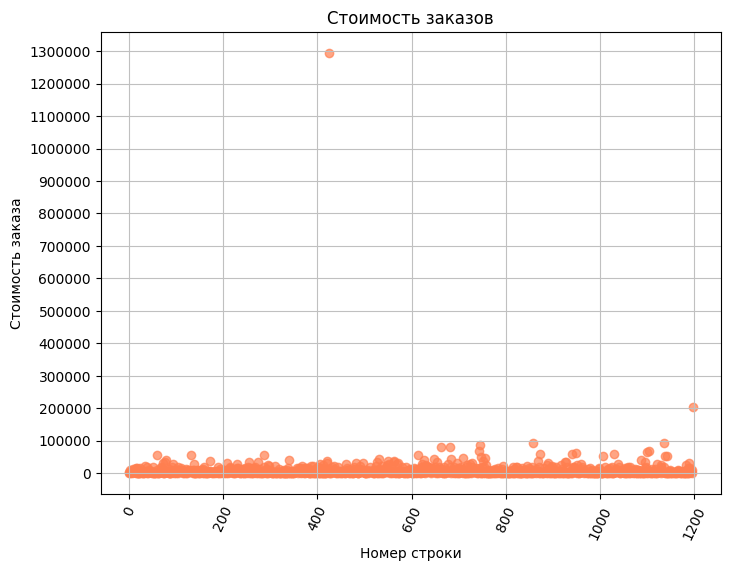

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))

fig = plt.figure(figsize=(8, 6))
plt.scatter(x_values, orders['revenue'], color = 'coral', alpha=0.7) 

plt.xticks(rotation=65)
plt.yticks(range(0, 1400000, 100000))
plt.grid(color = 'silver')
plt.title('Стоимость заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Номер строки')
plt.ticklabel_format(style='plain')

plt.show()

Согласно графику, стоимость большинства заказов составляет менее 100 000. За пределы этих значений выходят лишь два заказа, один - стоимостью 200 000 и один - стоимостью около 1 300 000.  
Чтобы точнее определить границу аномальных заказов рассчитаем 95-й и 99-й перцентили стоимости.

#### Подсчет перцентелей стоимости заказов

In [29]:
percentile_revenue = np.percentile(orders['revenue'], [95, 99])
print(f' 95-й перцентиль стоимости заказов на пользователя: {percentile_revenue[0]:.2f}')
print()
print(f' 99-й перцентиль стоимости заказов на пользователя: {percentile_revenue[1]:.2f}')

 95-й перцентиль стоимости заказов на пользователя: 28000.00

 99-й перцентиль стоимости заказов на пользователя: 58233.20


Возьмем за границу очистки выбросов 95-й перцентиль.

### Анализ А/В-теста по «сырым» данным

Сначала проанализируем результаты А/В-теста не удаляя выбросы в данных.  

Сформулируем гипотизы о наличии разницы между двумя группами по показателям среднего чека и количества заказов.  
Проверим, можно ли принять эти теории.

Примем показатель альфа равными 0.05.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Проверим, различаются ли группы по количеству заказов.

__Нулевая гипотеза:__   
Между группой А и группой В нет статистически значимых различий в среднем количестве заказов на посетителя.

__Альтернативная гипотеза:__   
Группа А и группа В различаются по среднему количеству заказов на посетителя.

In [30]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitorsPerDateA']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitorsCummulativeA']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitorsPerDateB']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitorsCummulativeB']

orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'transactionsPerDateB', 'revenuePerDateA']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'transactionsPerDateB': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'transactionsPerDateB', 'revenuePerDateB']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'transactionsPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'transactionCummulativeB',
    'revenueCummulativeB',
]

data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitorId', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitorId', 'orders'] 


sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

alpha = .05

results_raw_orders = stats.mannwhitneyu(sample_a, sample_b)[1]

print()
print('p-value:', "{0:.5f}".format(results_raw_orders))


if results_raw_orders < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print()

print('Относительный прирост среднего количества заказов на посетителя группы В к А:')
print("{0:.2%}".format(sample_b.mean() / sample_a.mean() - 1))


p-value: 0.01679
Отвергаем нулевую гипотезу

Относительный прирост среднего количества заказов на посетителя группы В к А:
13.81%


Результаты статистического анализа показывают, что между группами есть разница по количеству заказов. В группе В на 13.81% больше заказов чем в группе А.

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Проверим, различаются ли группы по среднему чеку.

__Нулевая гипотеза:__  
Между группой А и группой В нет статистически значимых различий в среднем чеке.

__Альтернативная гипотеза:__  
Группа А и группа В различаются по среднему чеку.

In [31]:
results_raw_cheque = stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'], 
    orders[orders['group']=='B']['revenue'])[1]

print()
print('p-value:', "{0:.5f}".format(results_raw_cheque))


if results_raw_cheque < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print()

print('Относительный прирост среднего чека на посетителя группы В к А:')
print("{0:.2%}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


p-value: 0.72929
Не получилось отвергнуть нулевую гипотезу

Относительный прирост среднего чека на посетителя группы В к А:
25.87%


Согластно тесту между группами нет статистически значимых различий. Однако отноительный прирост среднего чека на посетителя группы В к А составляет 25.87%.

### Анализ А/В-теста по очищеным данным

#### Подготовка очищенных от аномалий данных

Создадим список идентификаторов пользователей, совершавших аномально большое количество заказов или заплативших нехарактерно большие суммы за заказ.

In [32]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > percentile_orders[0]]['visitorId'],
        orders_by_users_b[orders_by_users_b['orders'] > percentile_orders[0]]['visitorId'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > percentile_revenue[0]]['visitorId']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64


#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «очищенным» данным. Сделайте выводы и предположения.

Отфильтруем данные по списку 'abnormal_users'.

Проверим, различаются ли группы по количеству заказов на основе очищенных данных.

__Нулевая гипотеза:__  
Между группой А и группой В нет статистически значимых различий в среднем количестве заказов на посетителя.

__Альтернативная гипотеза:__  
Группа А и группа В различаются по среднему количеству заказов на посетителя.

In [33]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitorId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitorId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 


results_orders = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]
print()
print('p-value:', "{0:.5f}".format(results_orders))


if results_orders < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print()

print('Относительный прирост в среднем количестве заказов на посетителя группы В к А по «очищенным» данным:')
print("{0:.2%}".format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)) 


p-value: 0.01304
Отвергаем нулевую гипотезу

Относительный прирост в среднем количестве заказов на посетителя группы В к А по «очищенным» данным:
17.27%


Среднее количество заказов для группы А и В снова раздичаются. При этом относительный прирост числа заказов группы В по отношению к группе А увеличился с 13.81% до 17.27%.

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Проверим, различаются ли группы по среднему чеку на основе очищенных данных.

__Нулевая гипотеза:__  
Между группой А и группой В нет статистически значимых различий в среднем чеке.

__Альтернативная гипотеза:__  
Группа А и группа В различаются по среднему чеку.

In [34]:
sample_a_filtered_cheque = orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormal_users)),
                )
            ]['revenue']

sample_b_filtered_cheque = orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormal_users)),
                )
            ]['revenue']

results_cheque = stats.mannwhitneyu(sample_a_filtered_cheque, sample_b_filtered_cheque)[1]
print()
print('p-value:', "{0:.5f}".format(results_cheque))


if results_cheque < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print()

print('Относительный прирост в среднем чеке группы В к А по «очищенным» данным:')
print("{0:.2%}".format(sample_b_filtered_cheque.mean()/sample_a_filtered_cheque.mean()-1)) 


p-value: 0.73848
Не получилось отвергнуть нулевую гипотезу

Относительный прирост в среднем чеке группы В к А по «очищенным» данным:
-1.96%


Согласно проверке по очищеным данных средние чеки не различаются. Относительный прирост среднего чека группы В к группе А, составлявший по данным с выбросами 25.87%, после очистки таблицы заметно снизился и превратился в убыль (-1.96%). 

#### Выводы по результатам А/В-теста

По итогам А/В-теста можно сделать следующие выводы:

1. Без учета выбросов нет статистически значимых различий по среднему чеку заказа. Группа В даже немного проигрывает группе А по этому показателю.
2. Количество заказов на пользователя между группами А и В имеет статистически значимые различия. 

Таким образом, нововведения, проверяемые в А/В-тесте увеличивают количество заказов, но не сказываются на среднем чеке этих заказов, а точнее, немного снижают его.


### График кумулятивной выручки по группам для очищеных данных

Чтобы принять решение о том, стоит ли продолжать тест, построим еще раз график кумулятивной выручки, но теперь по очищенным от выбросов данным. 

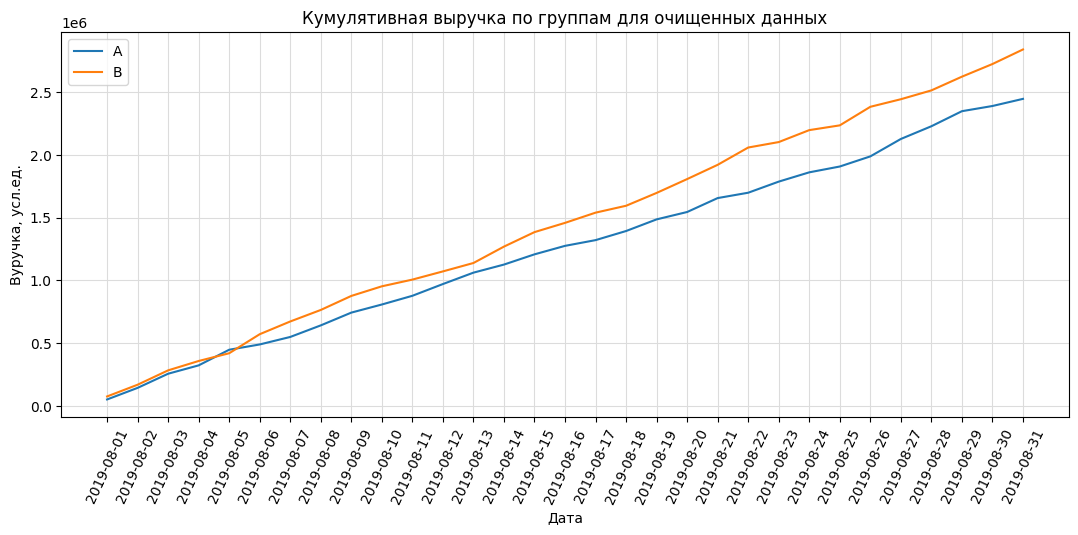

In [36]:
orders_clear =  orders[np.logical_not(orders['visitorId'].isin(abnormal_users))]

dates_groups_clear = orders_clear[['date','group']].drop_duplicates()
orders_aggregated = dates_groups_clear.apply(lambda x: orders_clear[np.logical_and(orders_clear['date'] <= x['date'], 
                                                                                   orders_clear['group'] == x['group'])]\
                                             .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 
                                                   'visitorId' : 'nunique', 
                                                   'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitors_aggregated = dates_groups_clear.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

fig = plt.figure(figsize=(13, 5))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.xticks(ticks=cumulative_revenue_a['date'], rotation=65)
plt.grid(color = 'gainsboro')
plt.title('Кумулятивная выручка по группам для очищенных данных')
plt.ylabel('Вуручка, усл.ед.')
plt.xlabel('Дата')

plt.legend()
plt.show()

Общая выручка группы В заметно выше, причем разница между группами продолжает увеличиваться. Это говорит о том, что даже несмотря на то, что средний чек в группе В немного ниже, в целом нововведения благотворно сказываются на прибыли.

## Выводы

Проведенный анализ позволяет сделать следующие выводы:

1. Кумулятивные метрики показывают, что основные показатели за рассмотреный период стабилизировались, а значит на основе полученных данных можно делать окончательные выводы, и продлевать эксперимент нет необходимости.
2. Значения средних чеков по группам не различаются статистически.
3. Показатели конверсии (количества заказов на пользователя) статистически различаются - в группе В они выше.
4. За счет того, что пользователи в группе В совершают больше заказов, они приносят интернет-магазину большую прибыль, даже не смотря на чуть меньший средний чек заказов. Это подтверждают и графики кумулятивной выручки по группам.

Таким образом, можно __завершить тест__, зафиксировать __победу группы В__ и рекомендовать интернет-магазину __использовть на постоянной основе те нововведения__, которые проверялись в А/В-тесте.